# Part 16 of Recipes: Automating Heatmaps

This page is primarily based on the following page at the Circos documentation site:



- [16. Automating Heatmaps](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 15 by clicking [here &#8592;](Recipes_Part16.ipynb).



----



8 --- Recipes
=============

16. Automating Heatmaps
-----------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/automating_heatmaps/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/automating_heatmaps/images){.normal}
[Configuration](/documentation/tutorials/recipes/automating_heatmaps/configuration){.normal}
:::

Before reading this tutorial, make sure that you understand how dynamic
configuration parameters work (see [Configuration Files
Tutorial](/documentation/tutorials/configuration/configuration_files/))
and have read through the [Automating Tracks
Tutorial](/documentation/tutorials/recipes/automating_tracks/).

For this tutorial, I have created an image with 100 heat map tracks. The
data for these tracks are gene densities computed across differently
sized windows (0.5-50 Mb). The higest resolution file is
`data/8/17/genes.0.txt` which samples density every 500kb. The lowest
resolution file is `data/8/17/genes.99.txt` which samples density every
50,000kb (1/100th resolution of `genes.0.txt`).

The gene densities were designed so that each heat map interval occupies
the same number of pixels along the map\'s circumference.

### changing heat map color

The color of the heat map is specified using a list of colors

```ini
color = red,green,blue
```


or a color list

```ini
color = spectral-11-div
```


For more about color lists, see the [Configuration Files
Tutorial](/documentation/tutorials/configuration/configuration_files/).

The track counter can be used to dynamically change the color scheme.
For example, as the track counter increases from 0 to 99, the definition

```ini
color = eval(sprintf("spectral-%d-div",remap_round(counter(plot),0,99,11,3)))
```


will assign a list to a track based on the counter. The assignment will
range from `spectral-11-div` for the outer-most track, progressing
through `spectral-10-div`, \..., and end at `spectral-3-div` for the
inner-most track.

You can combine multiple color maps. Here, an orange sequential color
list is added to a reversed blue sequential one.

```ini
color = eval(sprintf("blues-%d-seq-rev,oranges-%d-seq-rev",
remap_round(counter(plot),0,99,9,3),
remap_round(counter(plot),0,99,9,3)))
```


Given the reduced resolution of the inner-most track, reducing the
number of colors in its heat map can make the figure more legible.

### adjusting log scaling

The `scale_log_base` parameter controls how heat map values are mapped
onto colors. The default value of this parameter is
`scale_log_base = 1`, which corresponds to a linear mapping. For more
details about this parameter, see the [Heat Map
Tutorial](/documentation/tutorials/2d_tracks/heat_maps/).

Keeping the color list constant, but varying the `scale_log_base`, you
can increase the dynamic range of color sampling for small values (if
`log_scale_base < 1`) or large values (if `log_scale_base > 1`).

```ini
color          = spectral-11-div
# 0.05, 0.10, 0.15, ..., 5.00
scale_log_base = eval(0.05*(1+counter(plot)))
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/16/

/home/jovyan/circos-tutorials-0.67/tutorials/8/16


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.45s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.46s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/16
debuggroup summary 0.46s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.46s loading configuration from file circos.conf
debuggroup summary 0.46s found conf file circos.conf
debuggroup summary 0.74s debug will appear for these features: output,summary
debuggroup summary 0.74s bitmap output image ./circos.png
debuggroup summary 0.74s SVG output image ./circos.svg
debuggroup summary 0.76s parsing karyotype and organizing ideograms
debuggroup summary 0.90s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.92s applying global and local scaling
debuggroup summary 0.92s allocating image, colors and brushes
debuggroup summary 3.40s drawing 6 ideograms of total size 1,233,657,033
debuggroup summary 3.40s drawing highlights and ideograms
debuggroup summ

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized val

View the plot in this page using the following cell.

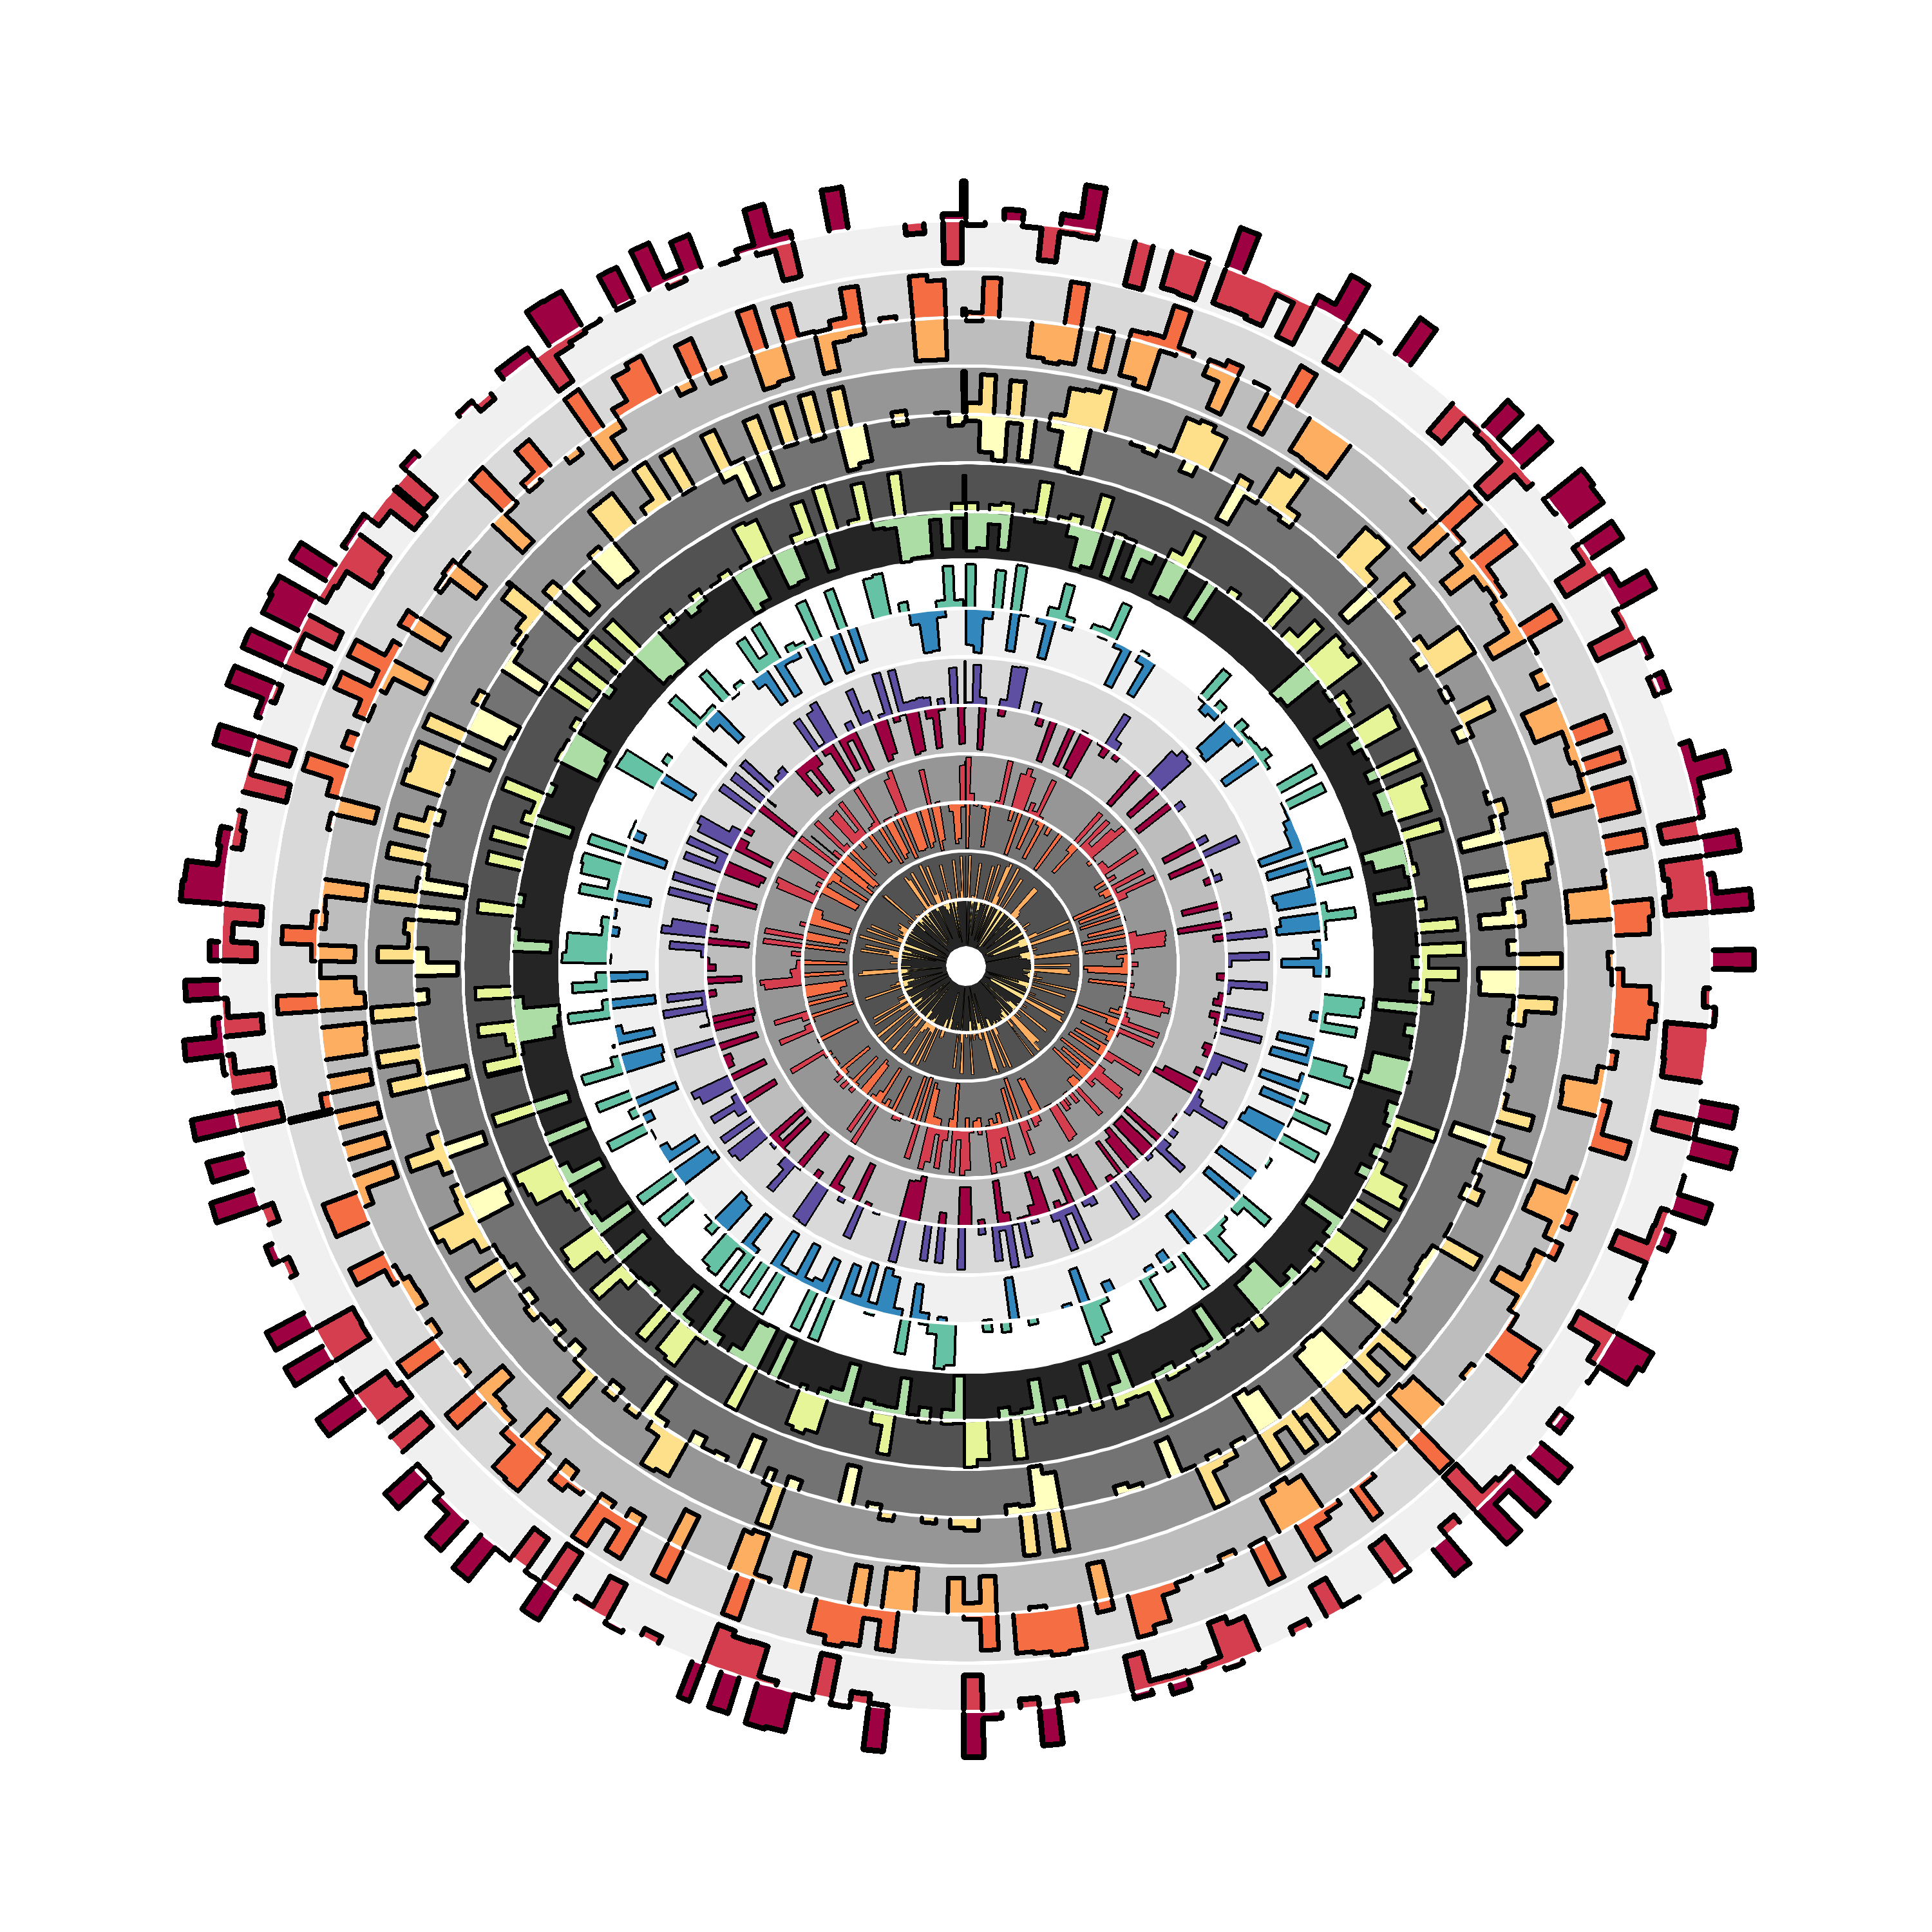

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](Recipes_Part18.ipynb).

----